In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = session.query(measurements.date).order_by(measurements.date.desc()).first()
date

('2017-08-23',)

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


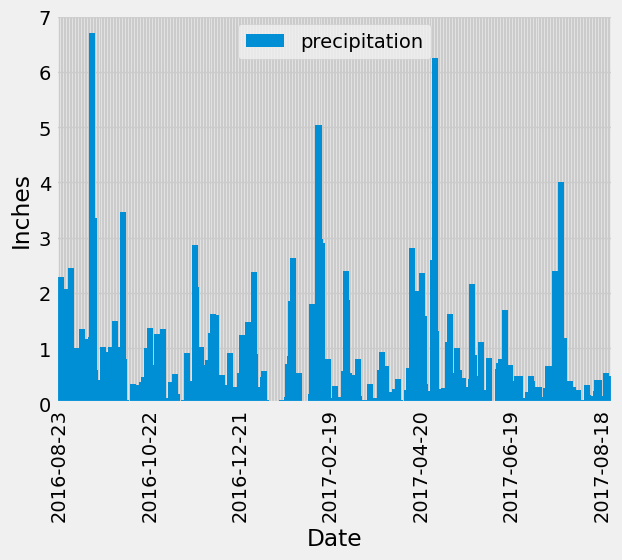

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
min_date = dt.datetime(2016,8,22)
max_date = dt.datetime(2017,8,23)

# Perform a query to retrieve the data and precipitation scores
data = [measurements.date, func.max(measurements.prcp)]
precip_totals = session.query(*data).filter(measurements.date > min_date).group_by(measurements.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_totals, columns = ['Date', 'precipitation'])
# Sort the dataframe by date
precip_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.set_index('Date', inplace=True)
ax = precip_df.plot.bar(width = 4)
ax.set_xlabel("Date")
ax.set_ylabel("Inches")

# Limiting x labels to every 60 days
for i, t in enumerate(ax.get_xticklabels()):
     if (i % 60) != 0:
         t.set_visible(False)
plt.show()


In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_data = session.query(measurements.date, measurements.prcp).filter(measurements.date > min_date)
measurement_df = pd.DataFrame(measurement_data)
measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurements.station).group_by(measurements.station).count()

9

In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_data = session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).filter(measurements.station == "USC00519281")
for data in station_data:
    print(data)

(54.0, 85.0, 71.66378066378067)


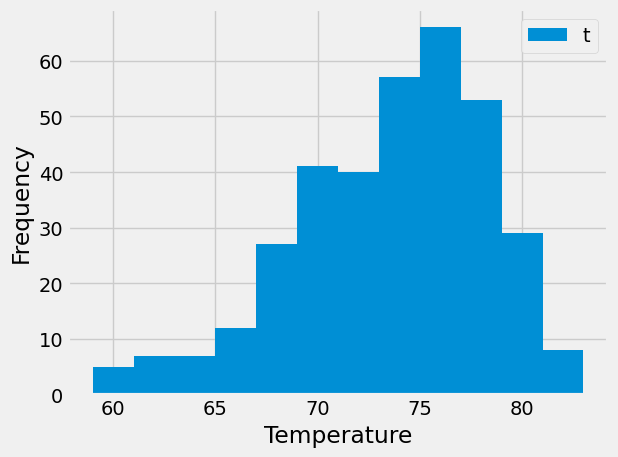

In [179]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurements.tobs).filter(measurements.station == 'USC00519281', measurements.date > min_date)
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

#plt.hist(column='Temperature', bins=12)
plt.hist(temperature_df, bins=12)
plt.legend('tobs', loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [180]:
# Close Session
session.close()